# Classification

Unlike regression where you predict a continuous number, you use classification to predict a category. 

Classification models include linear models like Logistic Regression, SVM, and nonlinear ones like K-NN, Kernel SVM and Random Forests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Logistic Regression

Logistic Regression is used when the dependent variable(target) is categorical.<br>
Logistic Regression is a linear classifier.<br>
Logistic Regression returns probabilities.

For example,
* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

Linear Function: $y = b_0 + b_1x$<br>
<font color='blue'>Logistic Function: $p = \frac{1}{1+e^{-y}}$  $\longrightarrow$  $p(x) = \frac{1}{1+e^{-(b_0 + b_1x)}}$</font> where $p(x)$ is the Probability of $x$<img src='https://miro.medium.com/max/875/1*RqXFpiNGwdiKBWyLJc_E7g.png' width=600>
Inverse of Logistic Function:  $ln(\frac{p(x)}{1-p(x)}) = b_0 + b_1x$

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Fitting Logistic Regression

Logistic Regression is a linear classifier which means the categories will be separated by a straight line

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,solver='lbfgs')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

### Evaluate the Logistic Regression (Confusion Matrix)

In [5]:
from sklearn.metrics import confusion_matrix

Class contains Upper case at beginning of the word, but function is all Lower case

In [6]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

Where '65' and '24' are correct prediction, it means there're 89 (65+24) correct predictions and 11 (3+8) incorrect predictions

### Visualising

The prediction boundary is always a straight line if The logistic regression classifier is linear<br>
如果是 2 Dimensions 的话, prediction boundary是一条线。如果是3D的话, prediction boundary是一个直平面<br>
The prediction boundary can be non-linear when we build non-linear classifiers<br>

The idea to plot the following graph is to take all the pixel points of the framework and apply the classifier on it. It makes each pixel will have X (age) and y (salary).<br>
Then we apply the logistic regression to predict if each pixel point has value 0 or 1. <br>
It's going to colorize the pixel in red if it is 0, and it's green if it's 1.

contour  - 绘制等高线<br>
contourf - 填充等高线。实际上contourf 相当于 contour filled<br>
等高线填充: mp.contourf(x, y, z, 等高线条数，cmap=颜色映射)<br>
等高线绘制: mp.contour(x, y, z, 等高线条数，colors=颜色, linewidth=线宽)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


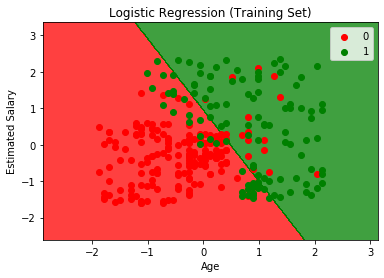

In [7]:
from matplotlib.colors import ListedColormap    # ListedColormap helps us colorize all the data points
# Create some local variable X set that we can replace X_train easily by other data later (ie. X_test)
X_set, y_set = X_train, y_train    
# np.meshgrid prepares all the pixel points, min and max value +-1 because we don't want the points to be squeezed on the axes
# X_set[:,0] is age and X_set[:,1] is salary in this case
# 生成网格数据
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
# Use the contourf function to actually make the contour between the two prediction regions
# X1.ravel() 将 matrix 变成 1D array
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## K-Nearest Neighbors (K-NN)

K-NN: 离需预测点最近的K个点来划分，划分区域内哪个categoray的点最多，预测点归哪个categoray.

**STEP 1:** Choose the number K of neighbors (most common default k = 5)<br>
**STEP 2:** Take the K nearest neighbors of the new data point, according to the Euclidean distance (most case)<br>
**STEP 3:** Among these K neighbors, count the number of data points in each category<br>
**STEP 4:** Assign the new data point to the category where you counted the most neighbors<br>

Euclidean Distance:  $dist(p,q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2}$<br>

K-NN is a non-linear classification

### Fitting K-NN Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier as knn
classifier = knn()    
# default n_neighbors = 5; use default setting metric = 'minkowski'and p =2, 
# so that we can use Euclidean distance (default)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


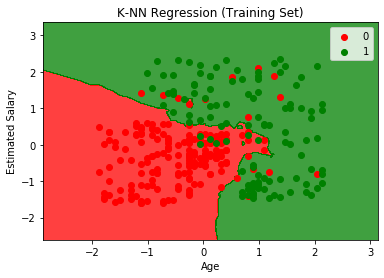

In [9]:
# Create some local variable X set that we can replace X_train easily by other data later (ie. X_test)
X_set, y_set = X_train, y_train    
# np.meshgrid prepares all the pixel points, min and max value +-1 because we don't want the points to be squeezed on the axes
# X_set[:,0] is age and X_set[:,1] is salary in this case
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
# Use the contourf function to actually make the contour between the two prediction regions
# X1.ravel() 将 matrix 变成 1D array
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Support Vector Machine (SVM)

SVM finds the best decision boundary to separate the space<br>

The line will draw the equal distance between the closet points in the different categories<br>

Those closet points in the different categories are called Support Vector<br>

The line (in 2D, in multi D, it's hyperplane) to separate the categories is called Maximum Margin Hyperplane<br>

SVM focuses on the closet categories (ie. the apple looks like orange, and the orange looks like the apple).这点和其他机器学习相反。因为Support Vector本身就非常互相接近。

## Kernel SVM

### Mapping to a Higher Dimension

不可分割的non-linear data set $\rightarrow$ Mapping Funcion $\varphi(x_1,x_2) = (x_1,x_2,z)$ $\rightarrow$ Higher Dimension $\rightarrow$ Find Hyperplane $\rightarrow$ Projection back $\rightarrow$ Get Non-Linear Separator<br>

For example, non-linear unseparatable 2D space could become a linearly separate if we map it into 3D space (Hyperplane)

缺点：太复杂，太消耗processor。

### The Gaussian RBF Kernel

**优势特点：**不用建立高维空间，就能建立非常复杂的 non-linear decision boundary

$K(x,l_i) = e^{-\frac{||x-l_i||^2}{2\sigma^2}}$<br><br>
$l_i$ is landmark(图形的中心点)。$||x-l_i||$表示每一个$x$到中心点的距离方程。$x$离中心越远，图形surface的值越接近0; $x$越接近中心点，值越接近1。

$\sigma$用来决定波底的圆多宽。<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/Gaussian_Kernel_1.JPG?raw=true' width='600'>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/Gaussian_Kernel_2.JPG?raw=true' width='600'>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/Gaussian_Kernel_3.JPG?raw=true' width='600'>

### Types of Kernel Functions

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/kernel_type.JPG?raw=true' width='600'>

In [10]:
from sklearn.svm import SVC

# Use default kernel, which is Gaussian Kernel ('rbf')
classifier = SVC(random_state=0).fit(X_train,y_train)

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


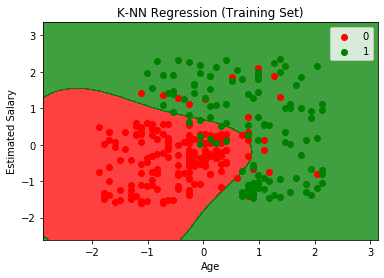

In [12]:
# Create some local variable X set that we can replace X_train easily by other data later (ie. X_test)
X_set, y_set = X_train, y_train    
# np.meshgrid prepares all the pixel points, min and max value +-1 because we don't want the points to be squeezed on the axes
# X_set[:,0] is age and X_set[:,1] is salary in this case
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
# Use the contourf function to actually make the contour between the two prediction regions
# X1.ravel() 将 matrix 变成 1D array
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Naive Bayes

### Bayes Theorem

$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$<br>
$P(A|B)$： 在B发生的情况下，A发生的概率

### Naive Bayes Classifier

**STEP 1:** 计算 $P(B|X) = \frac{P(X|B) * P(B)}{P(X)}$<br>

$P(B)$ - Prior Probability<br>
$P(B) = \frac{Number of B}{Total Observations}$<br><br>
$P(X)$ - Marginal Likelihood(新预测点的概率)：以新预测点为圆心，划一个范围(圆)，然后统计落入范围内的所有点数，在除以全部的点数。<br>
$P(X) = \frac{Number of Similar Observations}{Total Observations}$<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/naive_bayes_classifier_1.JPG?raw=true' width='500'>
$P(X|B)$ - Likelihood: 同样以新预测点为圆心，划一个范围，统计落入范围内B点数，除以B总点数。<br>
$P(X|B) = \frac{Number of Similar Observations Among those B}{Total Number of B}$<br><br>
$P(B|X)$ - Posterior Probability

**STEP 2:** 计算 $P(A|X) = \frac{P(X|A) * P(A)}{P(X)}$

**STEP 3:** $P(A|X)$  v.s.  $P(B|X)$: 两者(概率)比大小。谁(A or B)大，则新预测点就归属谁。

Bayes Theorem is based on independence assumption (for example, 'Age' and 'Salary' are independent)<br>
More Classes : $P(A|X)$ v.s. $P(B|X)$ v.s.$P(C|X)$ 三者间两两比大小

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(X_train,y_train)    # No arguments needed

In [14]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


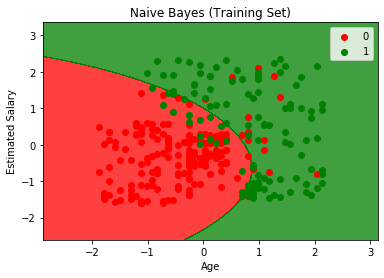

In [16]:
# Create some local variable X set that we can replace X_train easily by other data later (ie. X_test)
X_set, y_set = X_train, y_train    
# np.meshgrid prepares all the pixel points, min and max value +-1 because we don't want the points to be squeezed on the axes
# X_set[:,0] is age and X_set[:,1] is salary in this case
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
# Use the contourf function to actually make the contour between the two prediction regions
# X1.ravel() 将 matrix 变成 1D array
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive Bayes (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Decision Tree Classification

**Classification Trees :** it classifies the data for categorical variables such as male or female, apple or orange, different types of colors<br>
**Regression Trees :** it predicts outcomes which can be real numbers such as salary or temperature

**Entropy :** 每次 make decision 建立分支前的不确定程度(概率)。使用 Entropy 来测量每次分支后的质量<br>
$Entropy = -p(A)log(P(A)) - p(B)log(P(B))$<br>
**每次的 Entropy 越小，分支也会越少，每个节点的 category 也会越纯**

### 选择哪项 attribute 来分类

选用在分支后，Information Gain 高的那项 atrribute。<br>
Information Gain is the information that can increase the level of certainty after splitting<br>
**Information Gain** = (Entropy before split) - 当前分支点的概率 * (Entropy after split)<br>
例如：当前是第n层分支(性别)，所以当前分支点(男或女)概率 = 50%。仅考虑当前的分支点的概率，不用考虑从头累积的概率。

We must do preprocessing step (data scale) when the algorithm is based on Euclidean Distance.<br>
Decision Tree is not using Euclidean Distance, so we don't need preprocessing step.<br>
但是data scale后，运行速度会快很多。

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


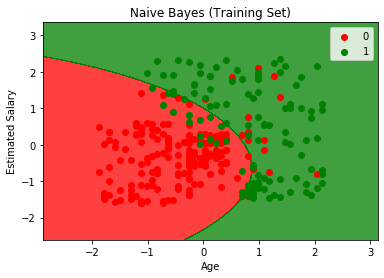

In [16]:
# Create some local variable X set that we can replace X_train easily by other data later (ie. X_test)
X_set, y_set = X_train, y_train    
# np.meshgrid prepares all the pixel points, min and max value +-1 because we don't want the points to be squeezed on the axes
# X_set[:,0] is age and X_set[:,1] is salary in this case
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
# Use the contourf function to actually make the contour between the two prediction regions
# X1.ravel() 将 matrix 变成 1D array
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Random Forest Classification

Random Forest method would combine a lot of decision tree method.

**STEP 1:** Pick at random K data points from the Training set<br>
**STEP 2:** Build a decision tree only based on those picked K data points<br>
**STEP 3:** Choose the number of trees you want to build and repeat STEP 1,2<br>
**STEP 4:** For a new data point, make each one of your trees predict the category to which the data points belongs, and assign the new data point to the category that wins the majority vote

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
# n_estimators: 将使用多少 decision trees 来组成 random forest (default = 10)
classifier = RFC(n_estimators=10,criterion='entropy',random_state=0).fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
# Create some local variable X set that we can replace X_train easily by other data later (ie. X_test)
X_set, y_set = X_train, y_train    
# np.meshgrid prepares all the pixel points, min and max value +-1 because we don't want the points to be squeezed on the axes
# X_set[:,0] is age and X_set[:,1] is salary in this case
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
# Use the contourf function to actually make the contour between the two prediction regions
# X1.ravel() 将 matrix 变成 1D array
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Evaluating Classification Models Performance

### False Positive & Negatives

**False Positive (Type I Error)** means we predicted something will happen, but it actually doesn't happen<br>
**False Negative (Type II Error)** means we predicted something won't happen, but it actually happens
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/false_positive_negative.JPG?raw=true' width='500'>
<br>Type II Error 更严重(危险)，Type I Error 像是警告。(如，Type I Error 预测有地震，结果没有发生。Type II Error 预测没有地震，结果发生了)

### Confusion Matrix

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/confusion_matrix.JPG?raw=true' width='700'>

### CAP (Cumulative Accuracy Profile) Curve

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/cap_1.JPG?raw=true' width='500'>
x-axis:累积输入模型的百分比。y-axis:累积成功(正确)的百分比。<br>
Random Curve像是一条模型参考线。用普查的方式确定发生概率。<br>
模型越接近random curve，模型表现越差。<br>
好的模型curve，是用最少的输入%,得出最多的正确结论。比如 ideal curve (crystal ball) 用 10% 的输入量，找出全部 100% 可能成功的结果。

### CAP Curve Analysis

判断模型好坏，通过50%的输入量，来看模型能覆盖多少(%)成功率
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/cap_2.JPG?raw=true' width='500'>
当模型覆盖率达到90%-100%，很有可能是 overfitting。

### 各类估算指标

Accuracy is not enough, so we should also look at other performance metrics like 
* Precision (measuring exactness)
* Recall (measuring completeness) 
* F1 Score (compromise between Precision and Recall)

Please find below these metrics formulas (TP = # True Positives, TN = # True Negatives, FP = # False Positives, FN = # False Negatives):
* $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
* $Precision = \frac{TP}{TP + FP}$
* $Recall = \frac{TP}{TP + FN}$
* $F1 Score = 2 \frac{Precision * Recall}{Precision + Recall}$

In [ ]:
def evaluate_performance(cm): # cm is confusion_matrix
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1_score = 2 * (precision * recall) / (precision + recall)
    print('Accuracy = ', accuracy)
    print('Prcision = ', precision)
    print('Recall = ', recall)
    print('F1 Score = ', F1_score)

### Python Metrics Library to Evaluating Performance

**To evaluate the model performance**
* from sklearn.metrics import accuracy_score
* from sklearn.metrics import precision_score
* from sklearn.metrics import recall_score
* from sklearn.metrics import f1_score
* from sklearn.metrics import classification_report

print('Accuracy = ', accuracy_score(y_test,y_pred))<br>
print('Prcision = ', precision_score(y_test,y_pred))<br>
print('Recall = ', recall_score(y_test,y_pred))<br>
print('F1 Score = ', f1_score(y_test,y_pred,average='weighted'))<br>

print(classification_report(y_test, y_pred))

## Conclusion of Classification

### The pros and cons of each model

<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%203%20-%20Classification/classification_pro_cons.JPG?raw=true' width='600'>

### The Model Selection

1. First need to figure out whether your problem is linear or non linear.
2. If your problem is linear, you should go for Logistic Regression or SVM.
3. If your problem is non linear, you should go for K-NN, Naive Bayes, Decision Tree or Random Forest.

Then from a business point of view, you would rather use:

- Logistic Regression or Naive Bayes when you want to rank your predictions by their probability. For example if you want to rank your customers from the highest probability that they buy a certain product, to the lowest probability. Eventually that allows you to target your marketing campaigns. And of course for this type of business problem, you should use Logistic Regression if your problem is linear, and Naive Bayes if your problem is non linear.

- SVM when you want to predict to which segment your customers belong to. Segments can be any kind of segments, for example some market segments you identified earlier with clustering.

- Decision Tree when you want to have clear interpretation of your model results,

- Random Forest when you are just looking for high performance with less need for interpretation. 